# Rain Forecasting for Australia

### Data set from [Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

In [1]:
import numpy as np
import pandas as pd

# import libraries for plotting
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# hiding warnings
import warnings

warnings.filterwarnings('ignore')

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

def plot_roc(preds):
    plt.figure(figsize=(3, 3), dpi=100)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    plt.plot(fpr, tpr)
    plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc_score(y_test, preds), ha='right', fontsize=12, weight='bold', color='blue')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
def plot_CF(matrix,model):
    plt.figure(figsize=(4,3))
    ax = sns.heatmap(matrix/np.sum(matrix),fmt='.2%', annot=True, cmap='Blues')

    ax.set_title('{} Confusion Matrix\n\n'.format(model));
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [2]:
# importing dataset
data = './weatherAUS.csv'

df = pd.read_csv(data)

# EDA

In [3]:
df.shape

(145460, 23)

In [4]:
df.head(25)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [5]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
# Null Values count
null_counts = round(df.isnull().sum()/len(df) * 100,2)
print('Percentages of Null values in Features :')
print(null_counts[null_counts > 0].sort_values(ascending=False))

Percentages of Null values in Features :
Sunshine         48.01
Evaporation      43.17
Cloud3pm         40.81
Cloud9am         38.42
Pressure9am      10.36
Pressure3pm      10.33
WindDir9am        7.26
WindGustDir       7.10
WindGustSpeed     7.06
Humidity3pm       3.10
WindDir3pm        2.91
Temp3pm           2.48
RainTomorrow      2.25
Rainfall          2.24
RainToday         2.24
WindSpeed3pm      2.11
Humidity9am       1.82
Temp9am           1.21
WindSpeed9am      1.21
MinTemp           1.02
MaxTemp           0.87
dtype: float64


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [9]:
#print(round(df.describe()),2)

## Target variables
1) RainToday
2) RainTomorrow

In [10]:
print('Unique: ',df['RainToday'].unique())
print('Nulls %: ',round(df['RainToday'].isnull().sum()/len(df)*100,3))

Unique:  ['No' 'Yes' nan]
Nulls %:  2.242


In [11]:
print('Unique: ',df['RainTomorrow'].unique())
df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100

Unique:  ['No' 'Yes' nan]


No     75.839406
Yes    21.914616
NaN     2.245978
Name: RainTomorrow, dtype: float64

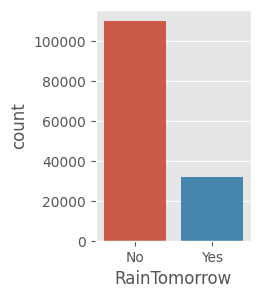

In [12]:
f, ax = plt.subplots(figsize=(2, 3))
ax = sns.countplot(x="RainTomorrow", data=df)
plt.show()

## EDA of Categorical Variables

In [13]:
cats = [var for var in df.columns if df[var].dtype=='O']
print('Number of variables: ',len(cats))
print('Variables :', cats)

Number of variables:  7
Variables : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [14]:
df[cats].head(10)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
5,2008-12-06,Albury,WNW,W,W,No,No
6,2008-12-07,Albury,W,SW,W,No,No
7,2008-12-08,Albury,W,SSE,W,No,No
8,2008-12-09,Albury,NNW,SE,NW,No,Yes
9,2008-12-10,Albury,W,S,SSE,Yes,No


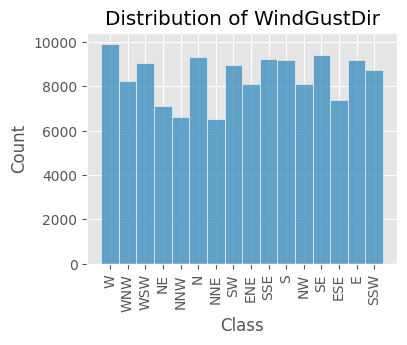

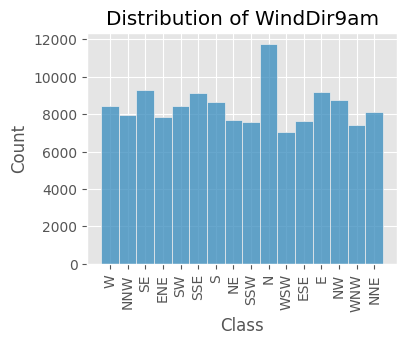

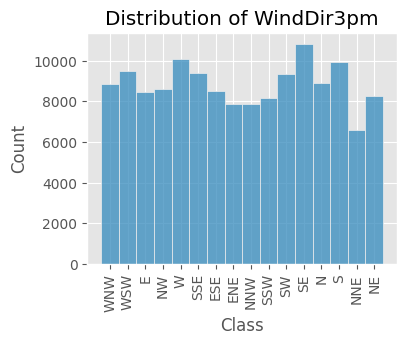

In [15]:
for col in cats:
    if col != 'Date' and col != 'Location' and col != 'RainToday' and col != 'RainTomorrow':
        plt.figure(figsize=(4,3))
        sns.histplot(data=df, x=col)
        temp = 'Distribution of {0}'.format(col)
        plt.title(temp)
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.show()

### Checking for high cardinality

In [16]:
print('Uniques in Categorical Variables')
for cols in cats:
    print('<{0}> : {1}'.format(cols,len(df[cols].unique())))

Uniques in Categorical Variables
<Date> : 3436
<Location> : 49
<WindGustDir> : 17
<WindDir9am> : 17
<WindDir3pm> : 17
<RainToday> : 3
<RainTomorrow> : 3


Text(0.5, 1.0, 'Cardinality Check for Categorical Variable')

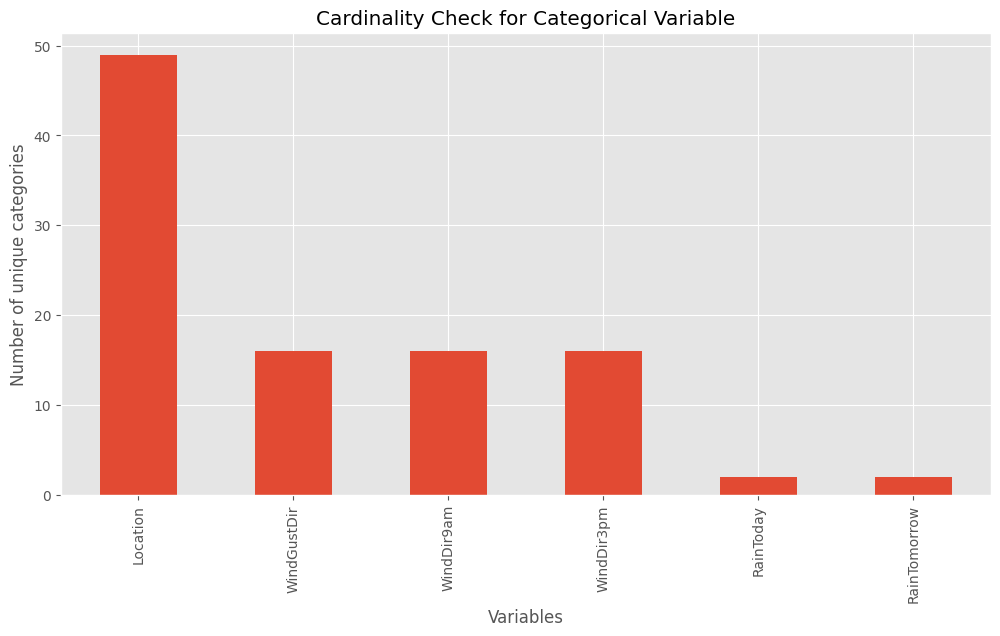

In [17]:
df[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']].nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality Check for Categorical Variable')

In [18]:
# Null Values in descending order
null_counts = round(df[cats].isnull().sum()/len(df)*100,3)
print("Null % in categorical variables:")
null_counts.sort_values(ascending=False)

Null % in categorical variables:


WindDir9am      7.264
WindGustDir     7.099
WindDir3pm      2.907
RainTomorrow    2.246
RainToday       2.242
Date            0.000
Location        0.000
dtype: float64

In [19]:
# unique of locations
print('There are',len(df['Location'].unique())," Unique of \'Location\':",df['Location'].unique())

There are 49  Unique of 'Location': ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [20]:
# we need to remove as we can't specifically tell if its gonna rain
# it's just around 2% data so we can remove
df['RainTomorrow'].isnull().sum()

3267

In [21]:
print('Nulls : ',df['RainTomorrow'].isnull().sum())
print('Length of new df :',df.shape)

Nulls :  3267
Length of new df : (145460, 23)


In [22]:
# Observing things we will replace missing with mode
for col in cats:
    if col != 'Location' and col != 'Date':
        df[col] = df[col].replace(np.nan,df[col].mode()[0])
print('Count of Nulls:',df[col].isnull().sum(),'in ',cats)

Count of Nulls: 0 in  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


## EDA of Numerical Variables

In [23]:
num_cols = []
for col in df:
    if df[col].dtype == 'float64':
        num_cols.append(col)

In [24]:
print(num_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [25]:
import random

color_=['#000057','#005757','#005700','#ad7100','#008080','#575757','#003153']
cmap_=['magma','copper','crest']

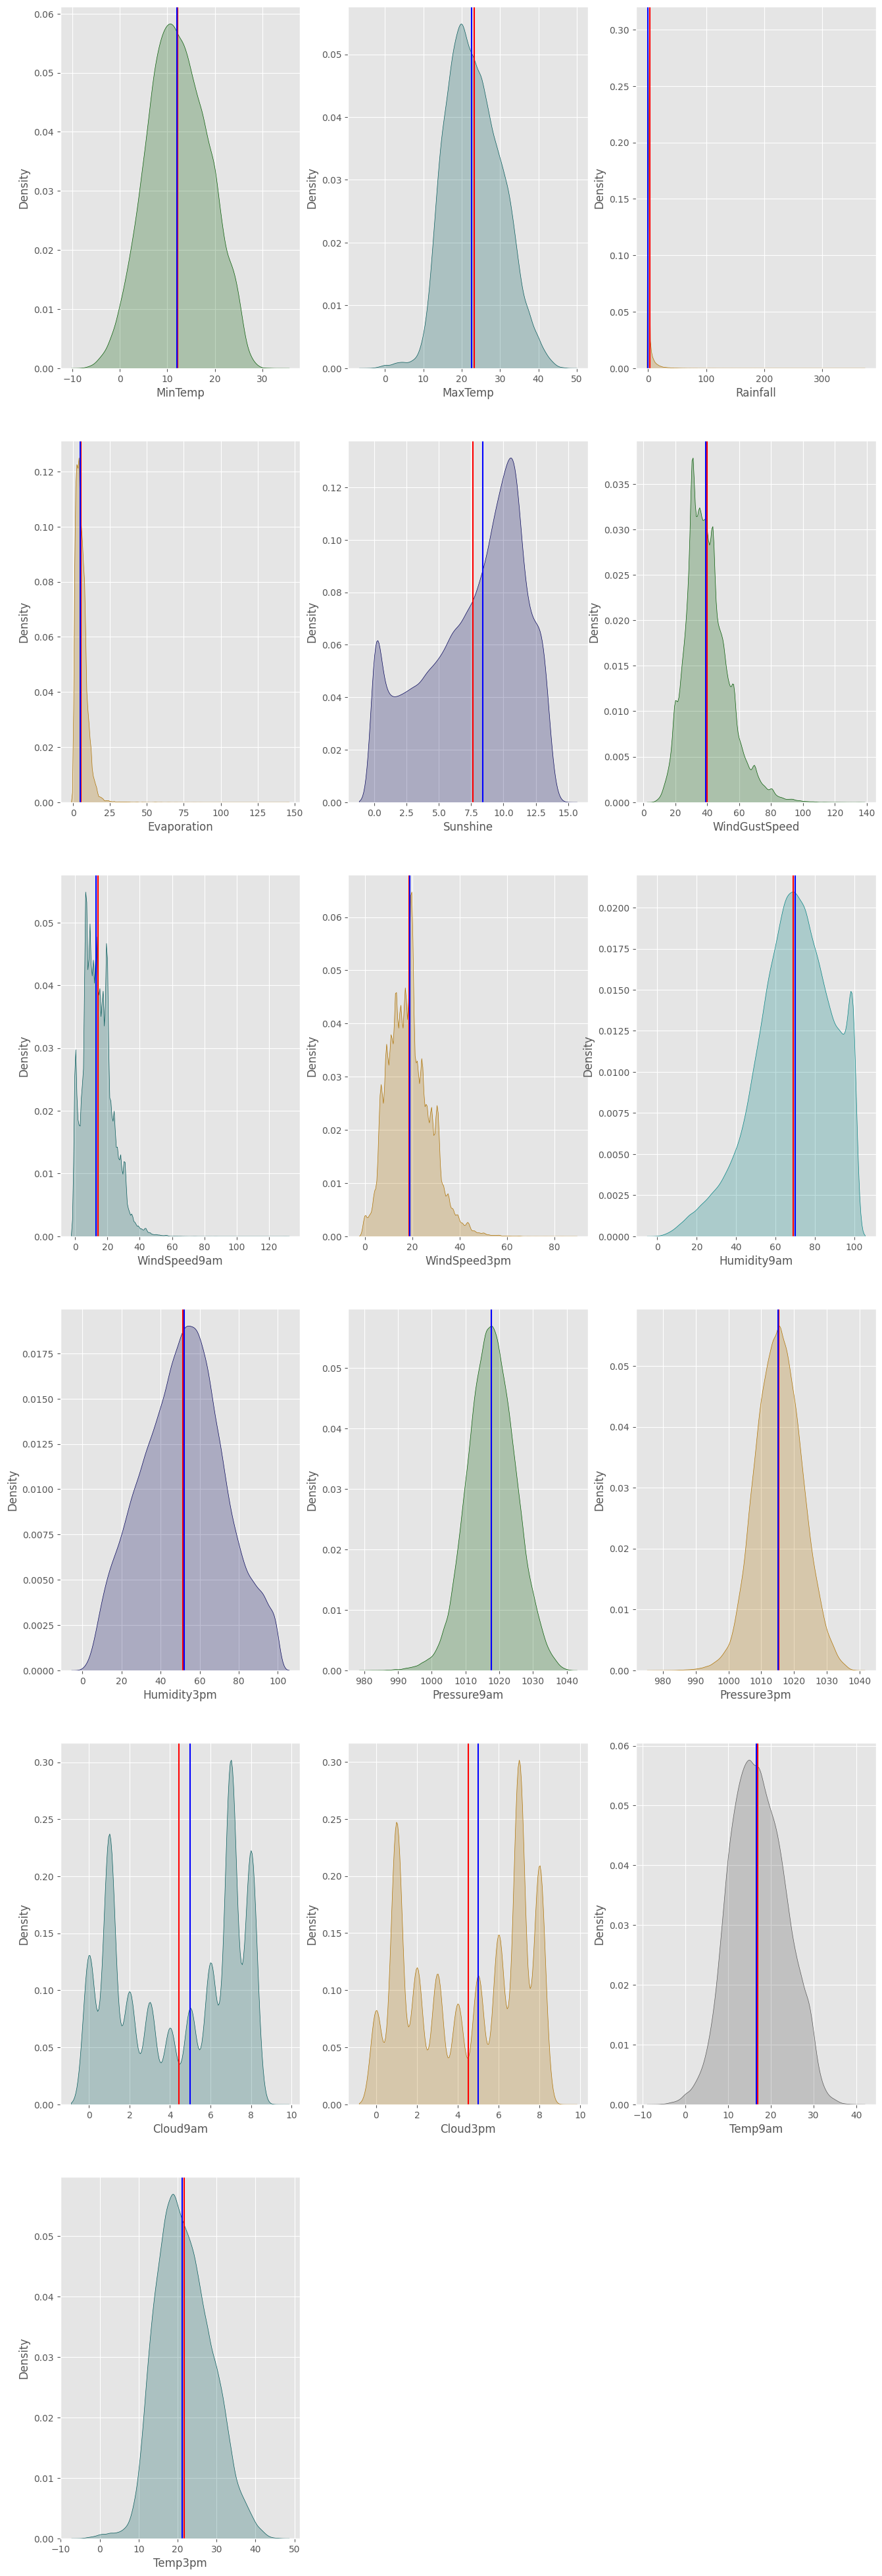

In [26]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[num_cols].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(6,3,i+1)
    sns.kdeplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])
    plt.axvline(x=df[col].mean(),
            color='red')
    plt.axvline(x=df[col].median(),
            color='blue')

<AxesSubplot:xlabel='Temp9am', ylabel='Temp3pm'>

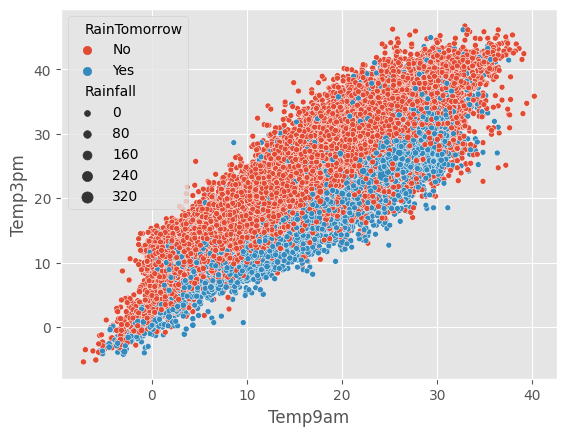

In [27]:
sns.scatterplot(df['Temp9am'],df['Temp3pm'],hue='RainTomorrow',size='Rainfall',data=df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Humidity3pm'>

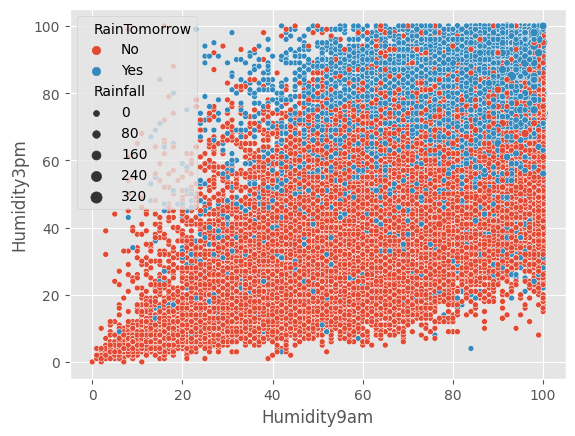

In [28]:
sns.scatterplot(df['Humidity9am'],df['Humidity3pm'],hue='RainTomorrow',size='Rainfall',data=df)

<AxesSubplot:xlabel='Pressure9am', ylabel='Pressure3pm'>

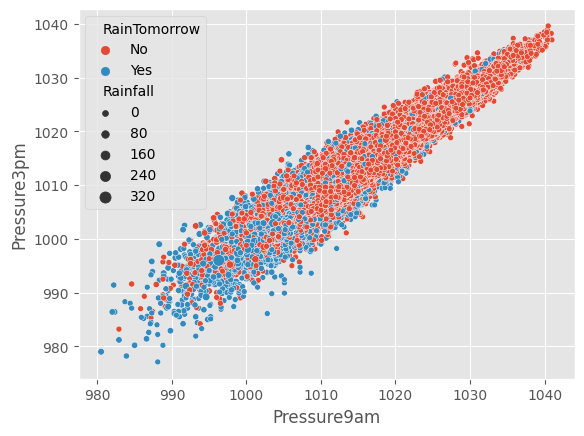

In [29]:
sns.scatterplot(df['Pressure9am'],df['Pressure3pm'],hue='RainTomorrow',size='Rainfall',data=df)

<AxesSubplot:xlabel='Pressure9am', ylabel='Pressure3pm'>

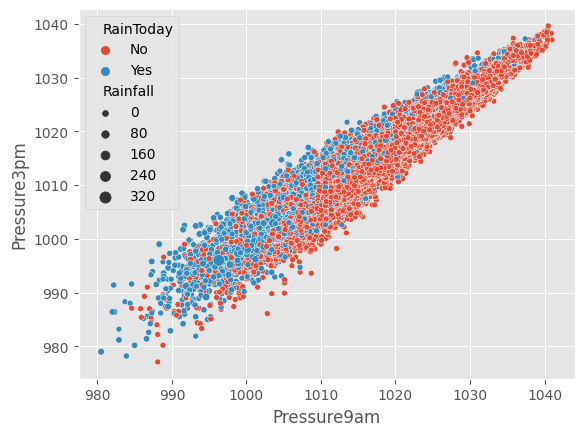

In [30]:
sns.scatterplot(df['Pressure9am'],df['Pressure3pm'],hue='RainToday',size='Rainfall',data=df)

In [31]:
# After checking the normalization
# Replacing NaN values to Mean of respective column
for col in num_cols:
        df[col] = df[col].replace(np.nan, df[col].median())

In [32]:
null_counts = round(df.isnull().sum()/len(df) * 100,2)
print('Percentages of Null values in Features :')
print(null_counts[null_counts > 0].sort_values(ascending=False))
# 0 nulls now

Percentages of Null values in Features :
Series([], dtype: float64)


In [33]:
for index,row in df.iterrows():
    if df['Rainfall'][index] > 0:
        df['RainToday'][index] = 'Yes'

In [34]:
df[['Rainfall','RainToday']]

,Rainfall,RainToday
0,0.6,Yes
1,0.0,No
2,0.0,No
3,0.0,No
4,1.0,Yes
...,...,...
145455,0.0,No
145456,0.0,No
145457,0.0,No
145458,0.0,No


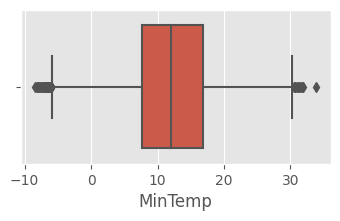

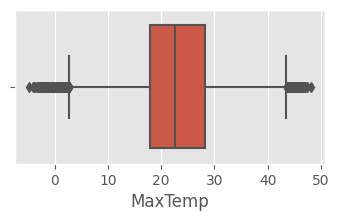

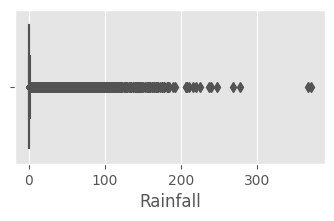

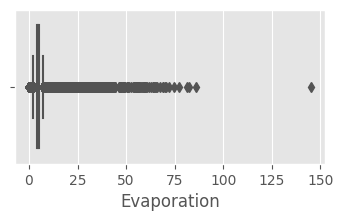

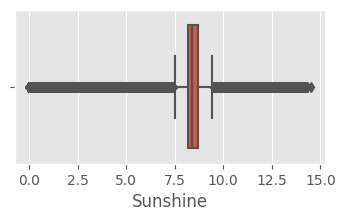

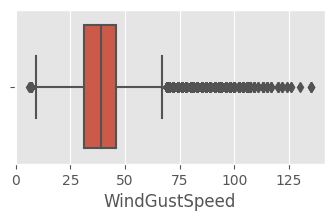

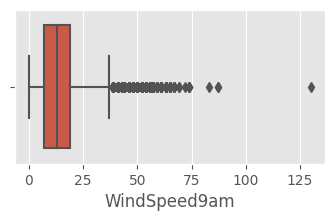

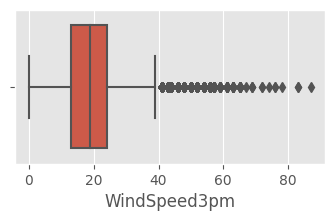

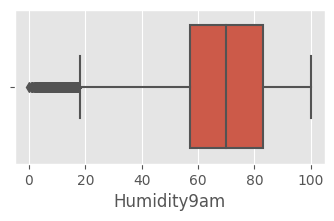

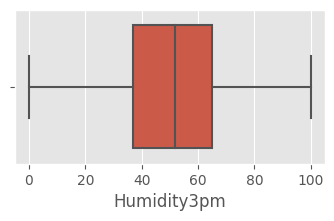

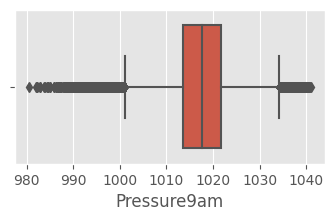

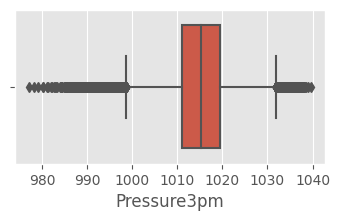

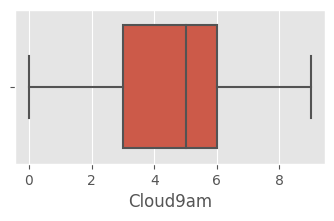

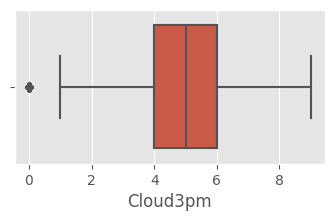

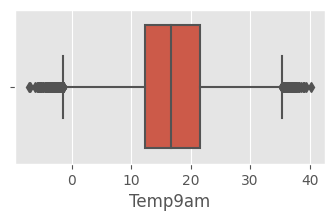

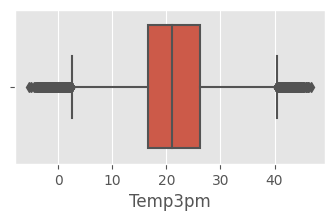

In [35]:
for i in num_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(df[i])
    plt.show()

In [36]:
for i in num_cols:
    IQR= df[i].quantile(.75)-df[i].quantile(.25)
    lower=df[i].quantile(.25) - (1.5 * IQR)
    upper=df[i].quantile(.75) + (1.5 * IQR)
    df[i]=np.where(df[i]<lower,lower,df[i])
    df[i]=np.where(df[i]>upper,upper,df[i])

In [37]:
df.shape

(145460, 23)

In [38]:
df[num_cols].skew()

MinTemp          0.023255
MaxTemp          0.240726
Rainfall         1.161516
Evaporation     -0.150406
Sunshine         0.100997
WindGustSpeed    0.460305
WindSpeed9am     0.511276
WindSpeed3pm     0.396355
Humidity9am     -0.440391
Humidity3pm      0.032054
Pressure9am      0.010242
Pressure3pm      0.035869
Cloud9am        -0.560375
Cloud3pm        -0.463719
Temp9am          0.095507
Temp3pm          0.261935
dtype: float64

## Heatmap for correlation

In [39]:
Labeler = LabelEncoder()
df['RainToday'] = Labeler.fit_transform(df['RainToday'])
df['RainTomorrow'] = Labeler.fit_transform(df['RainTomorrow'])
df['RainToday'] = Labeler.fit_transform(df['RainToday'])
df['RainTomorrow'] = Labeler.fit_transform(df['RainTomorrow'])

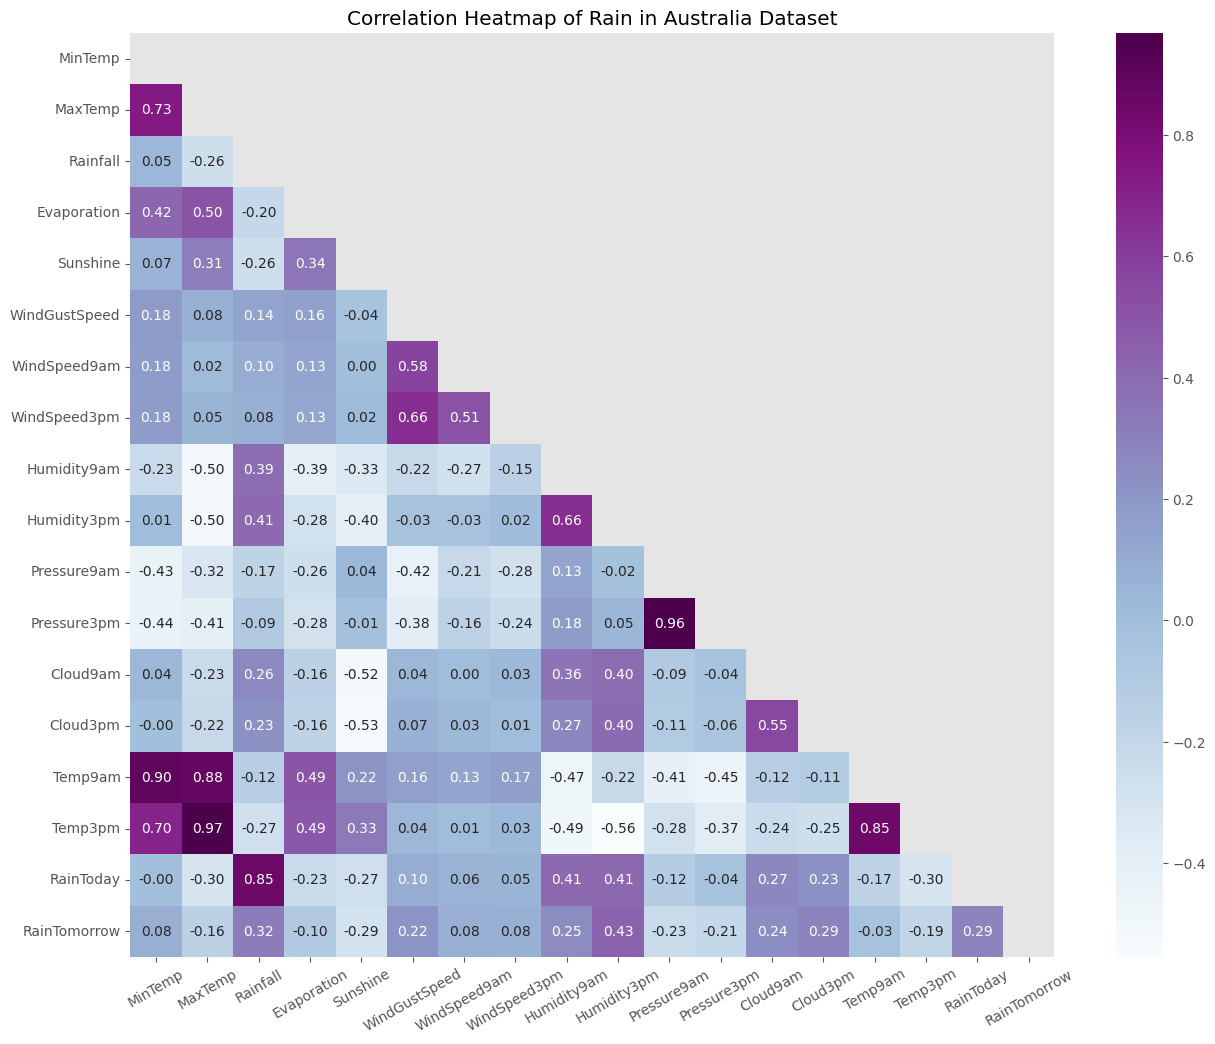

In [40]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(df.corr(), annot=True, square=True,  fmt='.2f',mask=mask,cmap='BuPu' )
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)           
sns.axes_style("white")
plt.show()

In [41]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
temp = df

temp['WindGustDir'] = Labeler.fit_transform(temp['WindGustDir'])
temp['WindDir9am'] = Labeler.fit_transform(temp['WindDir9am'])
temp['WindDir3pm'] = Labeler.fit_transform(temp['WindDir3pm'])

y, X = dmatrices('RainTomorrow ~ MinTemp+MaxTemp+Rainfall+WindGustDir+WindDir9am+WindDir3pm+WindGustSpeed+WindSpeed9am+WindSpeed3pm+Evaporation+Sunshine+Humidity9am+Humidity3pm+Pressure9am+Pressure3pm+Cloud9am+Cloud3pm+Temp3pm+Temp9am', data=temp, return_type='dataframe')

#calculate VIF for each explanatory variable
vif_tomorrow = pd.DataFrame()
vif_tomorrow['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_tomorrow['Features'] = X.columns
vif_tomorrow

In [41]:
X = df.drop(['RainTomorrow','Date','Location'],axis=1)
y= df[['RainTomorrow']]

In [42]:
X.drop(['WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)
X = pd.get_dummies(X,drop_first=True)

In [ ]:
##Classification

In [43]:
results = pd.DataFrame(columns=['Classifier','Accuracy','F1 Score'],index=[0,1,2,3])

In [45]:
##RANDOM FOREST

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [45]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=168,test_size=.30)

In [47]:
RFR_model= RandomForestClassifier()
RFR_model.fit(X_train,y_train)
RFR_model.score(X_train,y_train)
RF_pred= RFR_model.predict(X_test)
RF_accuracy = round(accuracy_score(y_test,RF_pred) * 100, 2)
RF_f1 = f1_score(y_test,RF_pred)

In [48]:
print("Random Forest Classifier: \nN_estimator:92\nAccuracy:",RF_accuracy,'\nF1 Score:',round(RF_f1,3))
results.iloc[0,:] = ['Random Forest',RF_accuracy,round(RF_f1,3)]


Random Forest Classifier: 
N_estimator:92
Accuracy: 85.31 
F1 Score: 0.595


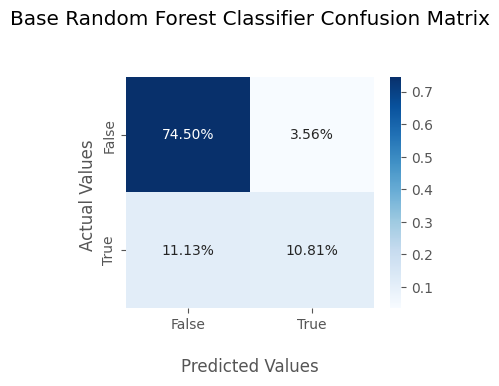

In [49]:
plot_CF(confusion_matrix(y_test,RF_pred),'Base Random Forest Classifier')

In [50]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     34066
           1       0.75      0.49      0.60      9572

    accuracy                           0.85     43638
   macro avg       0.81      0.72      0.75     43638
weighted avg       0.84      0.85      0.84     43638



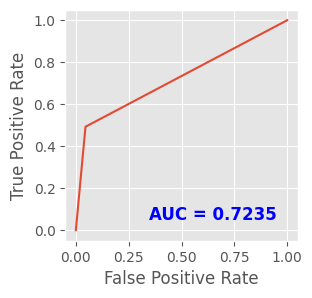

In [51]:
plot_roc(RF_pred)

In [52]:
## Hypertunning to Random Forest

In [53]:
n_estimator= [200, 400, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
max_depth=[10, 64, 118, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3,4,6,7,9]  #mini no of sample required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 64, 118, 173, 227, 282, 336],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4, 6, 7, 9]}

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
grid_search=RandomizedSearchCV(estimator=RFR_model,param_distributions=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   verbose=2)

In [56]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=336, max_features='auto', min_samples_split=3,
                       n_estimators=600)

In [57]:
grid_search.best_params_

{'n_estimators': 600,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 336}

In [58]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
GCV_pred=grid_search.best_estimator_.predict(X_test)

In [59]:
RFR_model= RandomForestClassifier(n_estimators= 800,
min_samples_split=2,
min_samples_leaf= 1,
max_depth= 227)
RFR_model.fit(X_train,y_train)
RFR_model.score(X_train,y_train)
RFR_pred= RFR_model.predict(X_test)
accuracy = round(accuracy_score(y_test,RFR_pred) * 100, 2)
f1 = f1_score(y_test,RFR_pred)

In [60]:
print(classification_report(y_test,RFR_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     34066
           1       0.76      0.50      0.60      9572

    accuracy                           0.86     43638
   macro avg       0.81      0.73      0.76     43638
weighted avg       0.85      0.86      0.84     43638



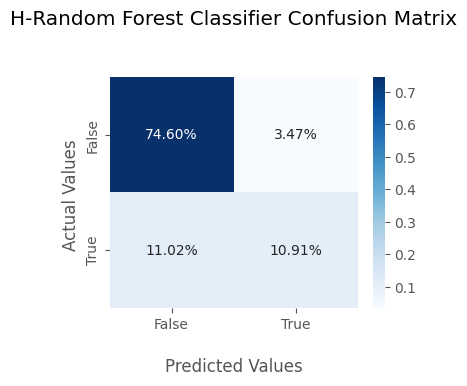

In [61]:
plot_CF(confusion_matrix(y_test,RFR_pred),'H-Random Forest Classifier')

In [62]:
results.iloc[1,:] = ['Hypertuned Random Forest',round(accuracy_score(y_test,RFR_pred) * 100, 2),round(f1_score(y_test,RFR_pred),3)]

In [63]:
results

,Classifier,Accuracy,F1 Score
0,Random Forest,85.31,0.595
1,Hypertuned Random Forest,85.51,0.601
2,NaN,NaN,NaN
3,NaN,NaN,NaN


In [64]:
## XGBoost

In [65]:
# FOR FINDING BEST estimator, learning rate
for alpha in [0.09,0.1]:
    for n in range(1,200):
        X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=n,test_size=.30)
        XGB_model= XGBClassifier(n_estimators=n,max_depth=8,learning_rate=alpha)
        XGB_model.fit(X_train,y_train)
        XGB_model.score(X_train,y_train)
        pred= XGB_model.predict(X_test)
        accuracy = round(accuracy_score(y_test,pred) * 100, 2)
        f1 = f1_score(y_test,pred)
        if f1 > 0.613 and accuracy > 85.1:
            print('State:',n,'Learning Rate:',alpha,'Accuracy:',accuracy,'F1 Score:',f1)    
            print('*'*70) 

State: 111 Learning Rate: 0.09 Accuracy: 85.63 F1 Score: 0.6141916425626192
**********************************************************************
State: 114 Learning Rate: 0.09 Accuracy: 85.51 F1 Score: 0.6136460814855538
**********************************************************************
State: 119 Learning Rate: 0.09 Accuracy: 85.46 F1 Score: 0.6131235516526405
**********************************************************************
State: 129 Learning Rate: 0.09 Accuracy: 85.71 F1 Score: 0.6150996975121922
**********************************************************************
State: 136 Learning Rate: 0.09 Accuracy: 85.54 F1 Score: 0.6141616729852024
**********************************************************************
State: 146 Learning Rate: 0.09 Accuracy: 85.39 F1 Score: 0.6135564447677943
**********************************************************************
State: 166 Learning Rate: 0.09 Accuracy: 85.61 F1 Score: 0.6137286259072456
******************************************

In [81]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=111,test_size=.30)
XGB = XGBClassifier(n_estimators=111,max_depth=8,learning_rate=0.1)
XGB.fit(X_train,y_train)
XGB.score(X_train,y_train)
XGB_pred= XGB.predict(X_test)
XGB_accuracy = round(accuracy_score(y_test,XGB_pred) * 100, 2)
XGB_f1 = f1_score(y_test,XGB_pred)

In [82]:
print("XGBoost Classifier: \nLearning Rate:0.1\nN_estimator:92\nMax Depth:118\nAccuracy:",XGB_accuracy,'\nF1 Score:',round(XGB_f1,3))
results.iloc[2,:] = ['XGBoost',XGB_accuracy,round(XGB_f1,3)]

XGBoost Classifier: 
Learning Rate:0.1
N_estimator:92
Max Depth:118
Accuracy: 85.72 
F1 Score: 0.617


In [83]:
print(classification_report(y_test,XGB_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     34070
           1       0.75      0.52      0.62      9568

    accuracy                           0.86     43638
   macro avg       0.81      0.74      0.76     43638
weighted avg       0.85      0.86      0.85     43638



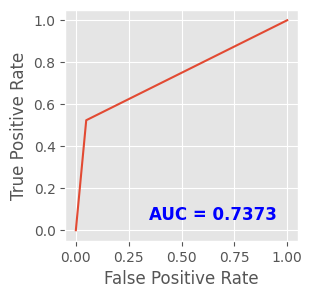

In [84]:
plot_roc(XGB_pred)

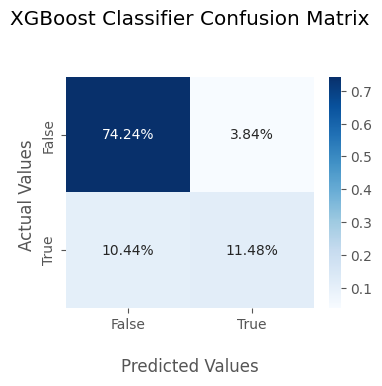

In [85]:
plot_CF(confusion_matrix(y_test,XGB_pred),'XGBoost Classifier')

In [86]:
results

,Classifier,Accuracy,F1 Score
0,Random Forest,85.31,0.595
1,Hypertuned Random Forest,85.51,0.601
2,XGBoost,85.72,0.617
3,Gradient Boosting,84.87,0.585


In [87]:
## Gradient Boosting

In [88]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=111,test_size=.30)
GB_model= GradientBoostingClassifier()
GB_model.fit(X_train,y_train)
GB_model.score(X_train,y_train)
GB_pred= GB_model.predict(X_test)
GB_accuracy = round(accuracy_score(y_test,GB_pred) * 100, 2)
GB_f1 = f1_score(y_test,GB_pred)

In [89]:
print("XGBoost Classifier: \nLearning Rate:0.1\nN_estimator:92\nMax Depth:118\nAccuracy:",GB_accuracy,'\nF1 Score:',round(GB_f1,3))
results.iloc[3,:] = ['Gradient Boosting',GB_accuracy,round(GB_f1,3)]

XGBoost Classifier: 
Learning Rate:0.1
N_estimator:92
Max Depth:118
Accuracy: 85.08 
F1 Score: 0.592


In [90]:
print(classification_report(y_test,GB_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     34070
           1       0.74      0.49      0.59      9568

    accuracy                           0.85     43638
   macro avg       0.80      0.72      0.75     43638
weighted avg       0.84      0.85      0.84     43638



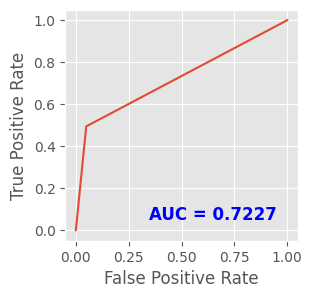

In [91]:
plot_roc(GB_pred)

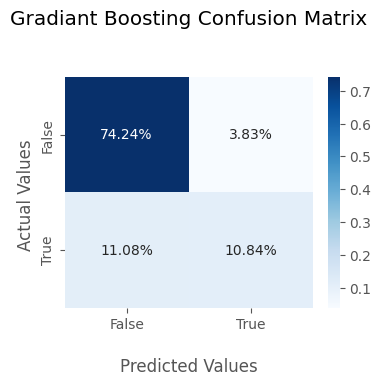

In [92]:
plot_CF(confusion_matrix(y_test,GB_pred),'Gradiant Boosting')

In [93]:
results

,Classifier,Accuracy,F1 Score
0,Random Forest,85.31,0.595
1,Hypertuned Random Forest,85.51,0.601
2,XGBoost,85.72,0.617
3,Gradient Boosting,85.08,0.592
